# Advanced layer types
## Different types of layers
In fact, the word deep in Deep Learning refers to the many layers that make the network deep.

So far, we have seen one type of layer, namely the fully connected, or dense layer. This layer is called fully connected, because all input neurons are taken into account by each output neuron.he number of parameters that need to be learned by the network, is thus in the order of magnitude of the number of input neurons times the number of hidden neurons.

There are many different types of layers that perform different calculations and take different inputs.

- We will take a look at convolutional layers and dropout layers, which are useful in the context of image data, but also in many other types of (structured) data.

## Image classification


In [42]:
import pandas as pd


In [43]:
from tensorflow import keras


In [44]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

The CIFAR-10 dataset consists of images of 10 different classes: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. It is widely used as a benchmark dataset for image classification. The low resolution of the images in the dataset allows for quick loading and testing models.

In [45]:
n = 5000
train_images = train_images[:n]
train_labels = train_labels[:n]


In [46]:
train_images.shape
#3 is the 3 colour of the images
#5000 is the number of training images
#32 and 32 is the width and height of pixels per image

(5000, 32, 32, 3)

In [47]:
train_images.min(), train_images.max()
#the vallues of the 3 channels are between 0 and 255

(0, 255)

In [48]:
train_labels.shape


(5000, 1)

In [49]:
train_labels.min(), train_labels.max()
#The values of the labels range between 0 and 9, denoting 10 different classes.

(0, 9)

The training set consists of 50000 images of 32x32 pixels and 3 channels (RGB values). The RGB values are between 0 and 255. For input of neural networks, it is better to have small input values. So we normalize our data between 0 and 1:



In [50]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [51]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

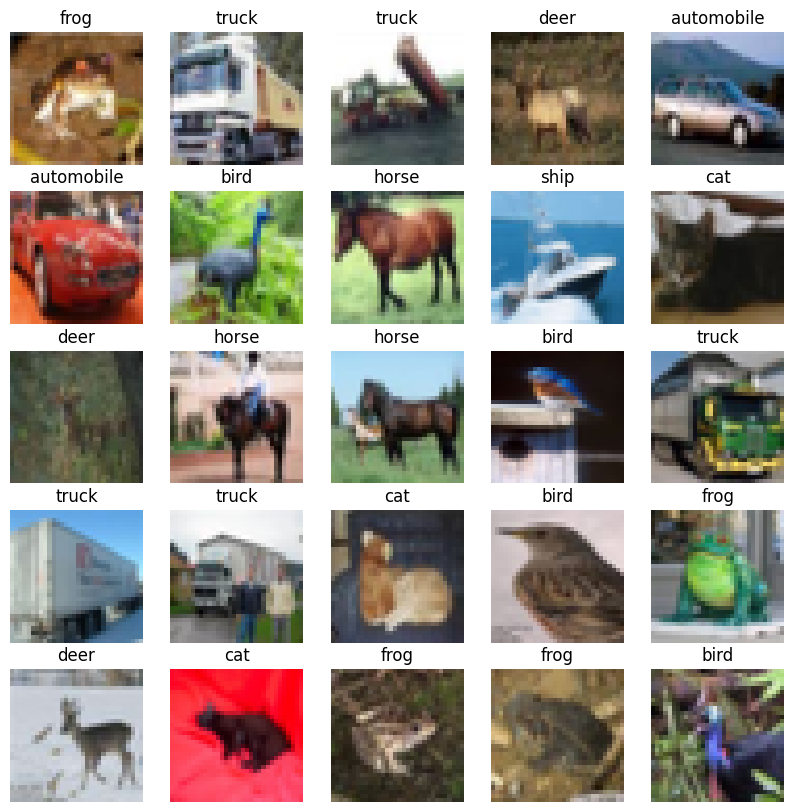

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(class_names[train_labels[i,0]])
plt.show()


## Convolutional layers
Note that our input dimension is now quite high (even with small pictures of 32x32 pixels), we have:

In [53]:
dim = train_images.shape[1] * train_images.shape[2] * train_images.shape[3]
print(dim)

3072


In [54]:
width, height = (32, 32)
n_hidden_neurons = 100
n_bias = 100
n_input_items = width * height * 3
n_parameters = (n_input_items * n_hidden_neurons) + n_bias
n_parameters

307300

In [55]:
#Another way of demonstrating the parameters is with keras
inputs = keras.Input(shape=dim)
outputs = keras.layers.Dense(100)(inputs)
model = keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 3072)]            0         
                                                                 
 dense_15 (Dense)            (None, 100)               307300    
                                                                 
Total params: 307,300
Trainable params: 307,300
Non-trainable params: 0
_________________________________________________________________


- We can decrease the number of units in our hidden layer, but this also decreases the number of patterns our network can remember
- If we increase the image size, the number of weights will ‘explode’, even though the task of recognizing large images is not necessarily more difficult than the task of recognizing small images.
- The features that we learn should be similar both for small and large images, and similar features (e.g. edges, corners) can appear anywhere in the image (in mathematical terms: translation invariant)
- A convolution matrix, or kernel, is a matrix transformation that we ‘slide’ over the image to calculate features at each position of the image. 
- A kernel is typically small, between 3x3 and 7x7 pixels. We can for example think of the 3x3 kernel
- This kernel will give a high value to a pixel if it is on a horizontal border between dark and light areas. Note that for RGB images, the kernel should also have a depth of 3.
- In our convolutional layer our hidden units are a number of convolutional matrices (or kernels), where the values of the matrices are the weights that we learn in the training process. The output of a convolutional layer is an ‘image’ for each of the kernels, that gives the output of the kernel applied to each pixel.
- What, do you think, happens to the border pixels when applying a convolution?

    - There are different ways of dealing with border pixels. You can ignore them, which means that your output image is slightly smaller then your input. It is also possible to ‘pad’ the borders, e.g. with the same value or with zeros, so that the convolution can also be applied to the border pixels. In that case, the output image will have the same size as the input image. A callout in the Data Carpentry: Image Processing with Python curriculum provides more detail about convolution at the boundaries of an image, in the context of applying a Gaussian blur.
    
    https://datacarpentry.org/image-processing/06-blurring.html#callout4
    
    https://setosa.io/ev/image-kernels/
    
    https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks#

In [56]:
#Finish with a Dense layer to connect the output cells of the convolutional layer to the outputs for our classes
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)#50 nodes for node1
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x) #50 nodes for node1
x = keras.layers.Flatten()(x)
#The Flatten layer converts the 28x28x50 output of the convolutional layer into a single one-dimensional vector, 
#that can be used as input for a dense layer.
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 30, 30, 50)        1400      
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 50)        22550     
                                                                 
 flatten_8 (Flatten)         (None, 39200)             0         
                                                                 
 dense_16 (Dense)            (None, 10)                392010    
                                                                 
Total params: 415,960
Trainable params: 415,960
Non-trainable params: 0
_________________________________________________________________


- The last dense layer has the most parameters. This layer connects every single output ‘pixel’ from the convolutional layer to the 10 output classes. That results in a large number of connections, so a large number of parameters. This undermines a bit the expressiveness of the convolutional layers, that have much fewer parameters.

- We compose a Convolutional network with two convolutional layers and two pooling layers.

In [57]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()


Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 50)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1800)        

In [58]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 [==============================] - 7s 38ms/step - loss: 2.0647 - accuracy: 0.2346 - val_loss: 1.8216 - val_accuracy: 0.3432
Epoch 2/10
157/157 [==============================] - 6s 36ms/step - loss: 1.7411 - accuracy: 0.3658 - val_loss: 1.6813 - val_accuracy: 0.3931
Epoch 3/10
157/157 [==============================] - 6s 41ms/step - loss: 1.6160 - accuracy: 0.4182 - val_loss: 1.6257 - val_accuracy: 0.4185
Epoch 4/10
157/157 [==============================] - 6s 37ms/step - loss: 1.5094 - accuracy: 0.4504 - val_loss: 1.6198 - val_accuracy: 0.4161
Epoch 5/10
157/157 [==============================] - 6s 37ms/step - loss: 1.3998 - accuracy: 0.4994 - val_loss: 1.5083 - val_accuracy: 0.4433
Epoch 6/10
157/157 [==============================] - 6s 38ms/step - loss: 1.3349 - accuracy: 0.5290 - val_loss: 1.4700 - val_accuracy: 0.4693
Epoch 7/10
157/157 [==============================] - 6s 37ms/step - loss: 1.2621 - accuracy: 0.5488 - val_loss: 1.4899 - val_accuracy: 0.4775

<Axes: >

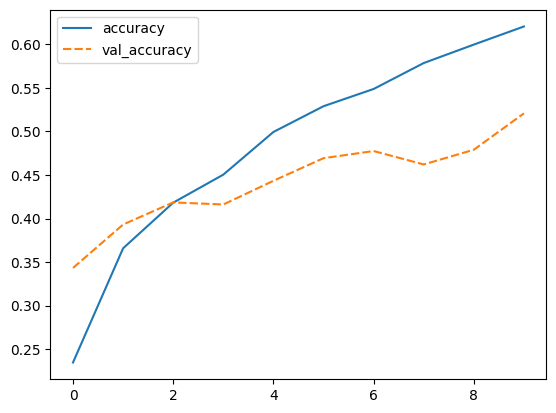

In [60]:
import seaborn as sns
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])


<Axes: >

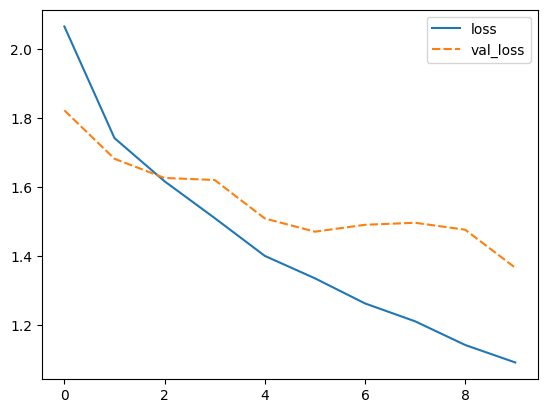

In [61]:
sns.lineplot(data=history_df[['loss', 'val_loss']])


- It seems that the model is overfitting somewhat, because the validation accuracy and loss stagnates.



- Create a model that has an additional Conv2d layer with 50 filters after the last MaxPooling2D layer. Train it for 20 epochs and plot the results.

In [64]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")

In [65]:
model.summary()

Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 15, 15, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 6, 6, 50)         0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 4, 4, 50)          

- The number of parameters has decreased by adding this layer. We can see that the conv layer decreases the resolution from 6x6 to 4x4, as a result, the input of the Dense layer is smaller than in the previous network.

Epoch 1/20
157/157 [==============================] - 7s 42ms/step - loss: 2.1151 - accuracy: 0.2014 - val_loss: 1.8884 - val_accuracy: 0.2886
Epoch 2/20
157/157 [==============================] - 6s 39ms/step - loss: 1.7756 - accuracy: 0.3496 - val_loss: 1.6521 - val_accuracy: 0.3924
Epoch 3/20
157/157 [==============================] - 6s 38ms/step - loss: 1.5744 - accuracy: 0.4258 - val_loss: 1.6672 - val_accuracy: 0.3855
Epoch 4/20
157/157 [==============================] - 6s 40ms/step - loss: 1.4484 - accuracy: 0.4746 - val_loss: 1.4985 - val_accuracy: 0.4556
Epoch 5/20
157/157 [==============================] - 6s 39ms/step - loss: 1.3737 - accuracy: 0.5038 - val_loss: 1.4682 - val_accuracy: 0.4596
Epoch 6/20
157/157 [==============================] - 6s 41ms/step - loss: 1.2864 - accuracy: 0.5386 - val_loss: 1.3762 - val_accuracy: 0.5041
Epoch 7/20
157/157 [==============================] - 6s 39ms/step - loss: 1.2280 - accuracy: 0.5618 - val_loss: 1.3862 - val_accuracy: 0.5061

<Axes: >

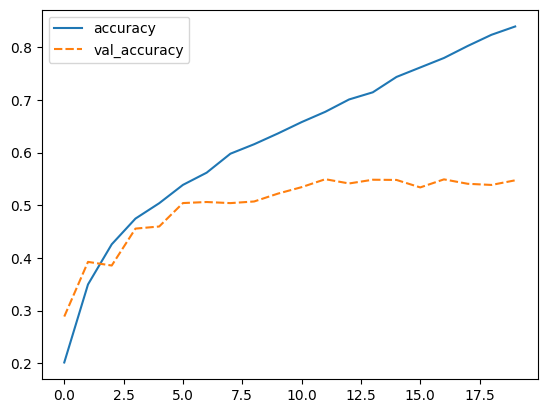

In [66]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

<Axes: >

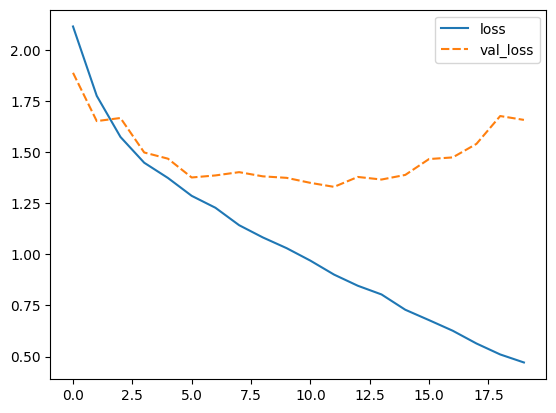

In [67]:
sns.lineplot(data=history_df[['loss', 'val_loss']])

- Convolutional and Pooling layers are also applicable to different types of data than image data. Whenever the data is ordered in a (spatial) dimension, and translation invariant features are expected to be useful, convolutions can be used

- Some example domains in which CNNs are applied:
    - Text data
    - Timeseries, specifically audio
    - Molecular structures

## Dropout

Techniques to avoid overfitting, or to improve model generalization, are termed regularization techniques. One of the most versatile regularization technique is dropout (Srivastava et al., 2014).

##### Dropout essentially means that during each training cycle a random fraction of the dense layer nodes are turned off. This is described with the dropout rate between 0 and 1 which determines the fraction of nodes to silence at a time.


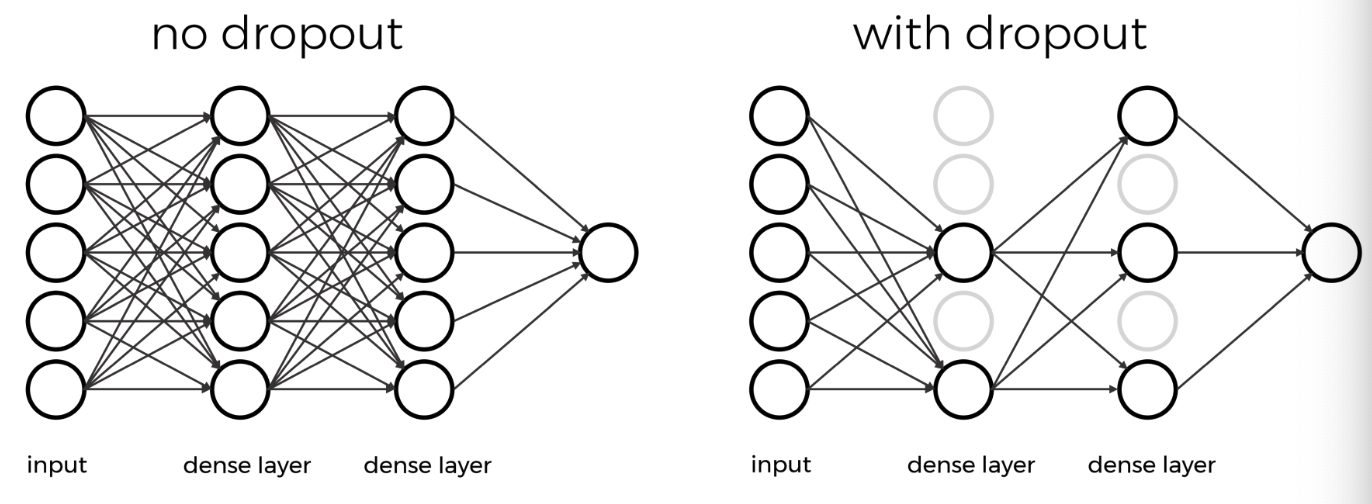

- Dropout layers will only randomly silence nodes during training.
- During a predictions step, all nodes remain active (dropout is off). 
- During training, the sample of nodes that are silenced are different for each training instance, to give all nodes a chance to observe enough training data to learn its weights.
- The dropout does not alter the dimensions of the image, and has zero parameters.

Add one dropout layer towards the end of the network, that randomly drops 20% of the input units.

In [68]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
#Dropout layer
x = keras.layers.Dropout(0.8)(x) # This is new!
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model_dropout = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")

model_dropout.summary()

Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 15, 15, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 6, 6, 50)         0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 4, 4, 50)          

In [69]:
model_dropout.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_dropout = model_dropout.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
157/157 [==============================] - 7s 40ms/step - loss: 2.1973 - accuracy: 0.1588 - val_loss: 1.9966 - val_accuracy: 0.2309
Epoch 2/20
157/157 [==============================] - 6s 40ms/step - loss: 2.0076 - accuracy: 0.2366 - val_loss: 1.9278 - val_accuracy: 0.2984
Epoch 3/20
157/157 [==============================] - 6s 39ms/step - loss: 1.8880 - accuracy: 0.2790 - val_loss: 1.8175 - val_accuracy: 0.3325
Epoch 4/20
157/157 [==============================] - 8s 53ms/step - loss: 1.8028 - accuracy: 0.3200 - val_loss: 1.6856 - val_accuracy: 0.3784
Epoch 5/20
157/157 [==============================] - 7s 42ms/step - loss: 1.7247 - accuracy: 0.3496 - val_loss: 1.6408 - val_accuracy: 0.3927
Epoch 6/20
157/157 [==============================] - 6s 39ms/step - loss: 1.6736 - accuracy: 0.3722 - val_loss: 1.6364 - val_accuracy: 0.4052
Epoch 7/20
157/157 [==============================] - 6s 41ms/step - loss: 1.6400 - accuracy: 0.3820 - val_loss: 1.5434 - val_accuracy: 0.4378

313/313 - 3s - loss: 1.2987 - accuracy: 0.5255 - 3s/epoch - 8ms/step


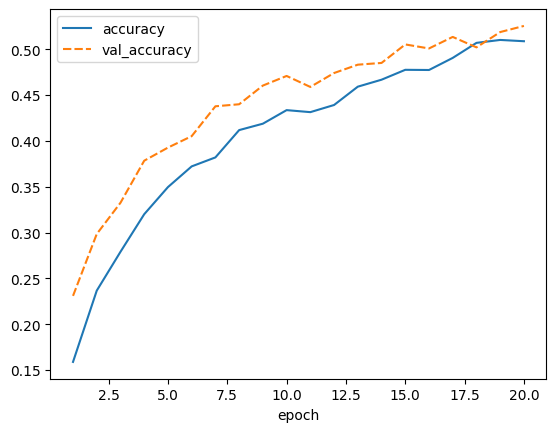

In [70]:
history_df = pd.DataFrame.from_dict(history_dropout.history)
history_df['epoch'] = range(1,len(history_df)+1)
history_df = history_df.set_index('epoch')
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

test_loss, test_acc = model_dropout.evaluate(test_images,  test_labels, verbose=2)


<Axes: xlabel='epoch'>

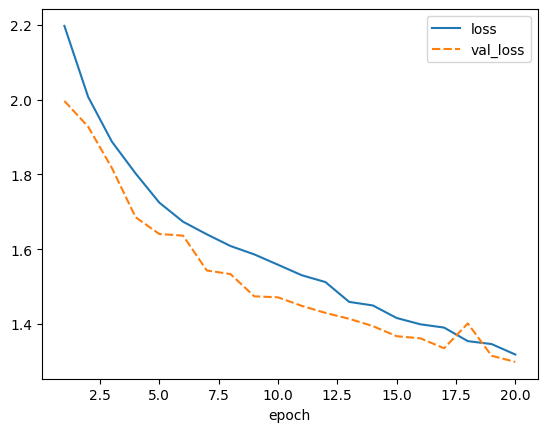

In [71]:
sns.lineplot(data=history_df[['loss', 'val_loss']])


- The gap between training accuracy and validation is smaller, even thought there are some differences

#Lowering the dropout rate
1. Varying the dropout rate
The code below instantiates and trains a model with varying dropout rates. You can see from the resulting plot that the ideal dropout rate in this case is around 0.45. This is where the test loss is lowest.

NB1: It takes a while to train these 5 networks.
NB2: In the real world you should do this with a validation set and not with the test set!



Epoch 1/20
157/157 [==============================] - 7s 40ms/step - loss: 2.1385 - accuracy: 0.1898 - val_loss: 1.9419 - val_accuracy: 0.2745
Epoch 2/20
157/157 [==============================] - 6s 41ms/step - loss: 1.7865 - accuracy: 0.3352 - val_loss: 1.6618 - val_accuracy: 0.3809
Epoch 3/20
157/157 [==============================] - 7s 42ms/step - loss: 1.6317 - accuracy: 0.4012 - val_loss: 1.5514 - val_accuracy: 0.4325
Epoch 4/20
157/157 [==============================] - 7s 43ms/step - loss: 1.5191 - accuracy: 0.4454 - val_loss: 1.4811 - val_accuracy: 0.4526
Epoch 5/20
157/157 [==============================] - 7s 43ms/step - loss: 1.4055 - accuracy: 0.4912 - val_loss: 1.4893 - val_accuracy: 0.4546
Epoch 6/20
157/157 [==============================] - 6s 40ms/step - loss: 1.3373 - accuracy: 0.5216 - val_loss: 1.4032 - val_accuracy: 0.4905
Epoch 7/20
157/157 [==============================] - 6s 41ms/step - loss: 1.2984 - accuracy: 0.5308 - val_loss: 1.3410 - val_accuracy: 0.5174

Epoch 17/20
157/157 [==============================] - 6s 41ms/step - loss: 0.9955 - accuracy: 0.6458 - val_loss: 1.2507 - val_accuracy: 0.5619
Epoch 18/20
157/157 [==============================] - 7s 42ms/step - loss: 0.9727 - accuracy: 0.6542 - val_loss: 1.3477 - val_accuracy: 0.5287
Epoch 19/20
157/157 [==============================] - 6s 41ms/step - loss: 0.9516 - accuracy: 0.6552 - val_loss: 1.2557 - val_accuracy: 0.5661
Epoch 20/20
313/313 [==============================] - 3s 9ms/step - loss: 1.2786 - accuracy: 0.5567
Epoch 1/20
157/157 [==============================] - 7s 39ms/step - loss: 2.1489 - accuracy: 0.1914 - val_loss: 1.9116 - val_accuracy: 0.3008
Epoch 2/20
157/157 [==============================] - 6s 39ms/step - loss: 1.8860 - accuracy: 0.2996 - val_loss: 1.7923 - val_accuracy: 0.3232
Epoch 3/20
157/157 [==============================] - 6s 40ms/step - loss: 1.7188 - accuracy: 0.3596 - val_loss: 1.6436 - val_accuracy: 0.3998
Epoch 4/20
157/157 [==================

<Axes: xlabel='dropout_rate', ylabel='test_loss'>

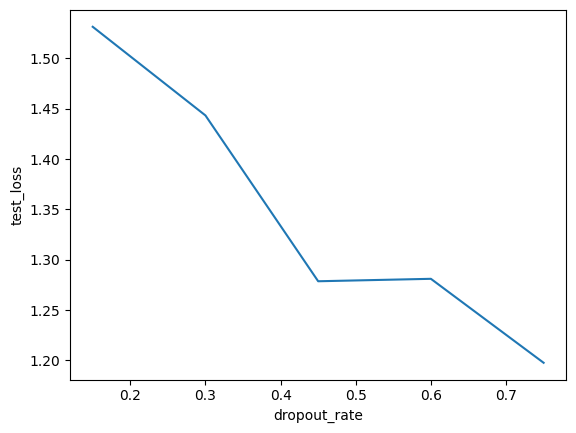

In [74]:
dropout_rates = [0.15, 0.3, 0.45, 0.6, 0.75]
test_losses = []
for dropout_rate in dropout_rates:
    inputs = keras.Input(shape=train_images.shape[1:])
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.Dropout(dropout_rate)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    outputs = keras.layers.Dense(10)(x)

    model_dropout = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")

    model_dropout.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    model_dropout.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

    test_loss, test_acc = model_dropout.evaluate(test_images,  test_labels)
    test_losses.append(test_loss)

loss_df = pd.DataFrame({'dropout_rate': dropout_rates, 'test_loss': test_losses})



<Axes: xlabel='dropout_rate', ylabel='test_loss'>

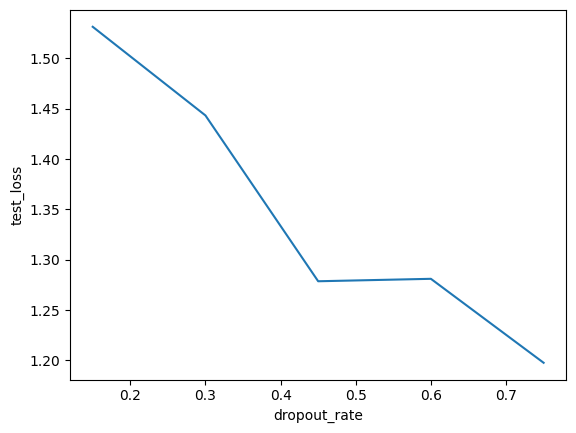

In [75]:
sns.lineplot(data=loss_df, x='dropout_rate', y='test_loss')

#### Conclusion:
    
    - Convolutional layers make efficient reuse of model parameters.

    - Pooling layers decrease the resolution of your input

    - Dropout is a way to prevent overfitting


https://carpentries-incubator.github.io/deep-learning-intro/04-advanced-layer-types/index.html